In [1]:
from PIL import Image

In [6]:
sun_image=Image.open("D:/Users/Dell/Documents/resources/RESOURCES_KIVY/2_GALAXY/V1/test/sun.png")
bg_image=Image.open("D:/Users/Dell/Documents/resources/RESOURCES_KIVY/2_GALAXY/V1/test/sky.png")

In [7]:
bg_image.size

(862, 352)

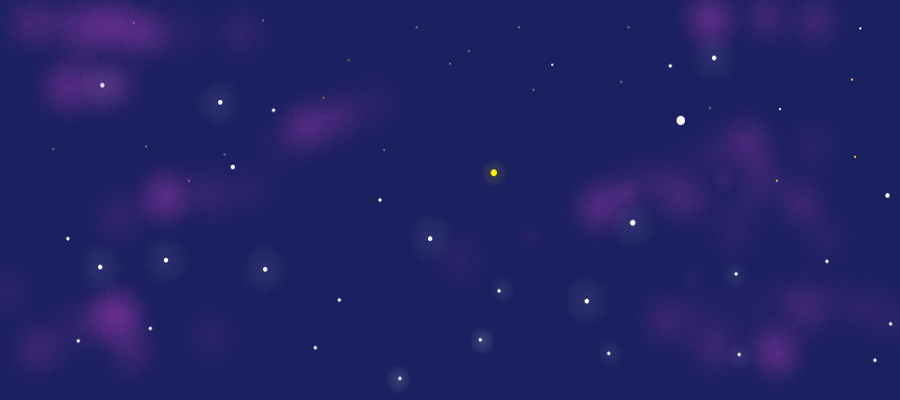

In [9]:
bg_image.resize((900,400))

In [10]:
sun_image.size

(862, 352)

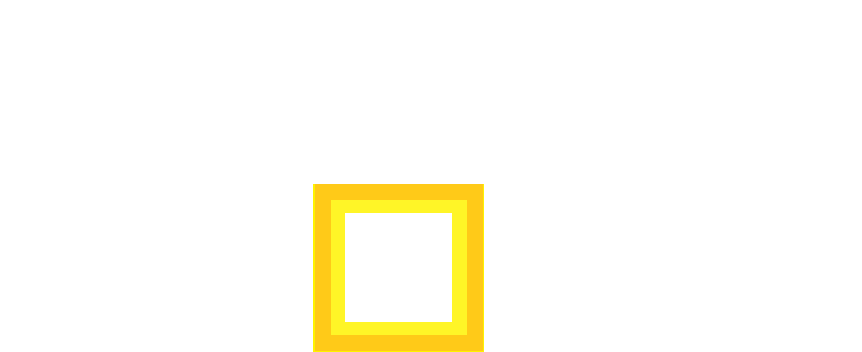

In [11]:
sun_image

In [12]:
import cv2

In [13]:
gray_img=sun_image.convert('L')

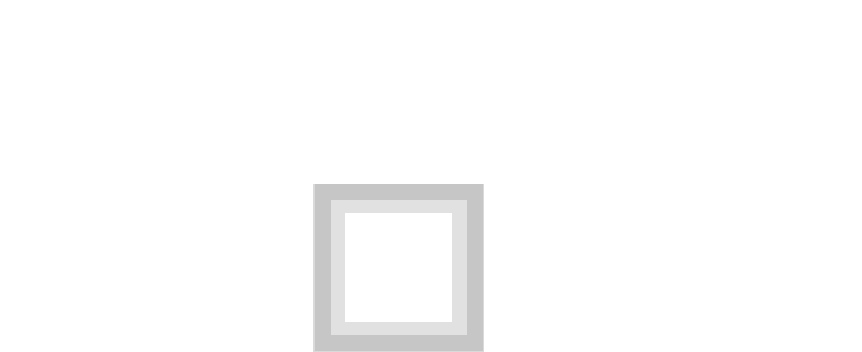

In [14]:
gray_img

In [15]:
import numpy as np

In [17]:
gray_array=np.array(gray_img)
gray_array

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [32]:
_,threshold=cv2.threshold(gray_array,127,255,cv2.THRESH_BINARY)
threshold

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [41]:
contours,_=cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [35]:
contors

[array([[[  0,   0]],
 
        [[  0, 351]],
 
        [[861, 351]],
 
        [[861,   0]]], dtype=int32)]

In [33]:
for contour in contours:
    

127.0

In [37]:
img=gray_array

In [42]:
for cnt in contours: 
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True) 
    print(len(approx))
    if len(approx)==5: 
        print( "pentagon") 
        cv2.drawContours(img,[cnt],0,255,-1) 
    elif len(approx)==3: 
        print( "triangle") 
        cv2.drawContours(img,[cnt],0,(0,255,0),-1) 
    elif len(approx)==4: 
        print( "square") 
        cv2.drawContours(img,[cnt],0,(0,0,255),-1) 
    elif len(approx) == 9: 
        print( "half-circle") 
        cv2.drawContours(img,[cnt],0,(255,255,0),-1) 
    elif len(approx) > 15: 
        print( "circle") 
        cv2.drawContours(img,[cnt],0,(0,255,255),-1) 
        
cv2.imshow('img',img) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

4
square


In [47]:
import cv2
import numpy as np

img = np.array(sun_image)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

cnts = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for cnt in cnts:
    print(f" new = {cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)}")
    approx = cv2.contourArea(cnt)
    print(approx)

cv2.imshow('image', img)
cv2.imshow('Binary',thresh_img)
cv2.waitKey()

 new = [[[345 213]]

 [[345 321]]

 [[451 321]]

 [[451 213]]]
11448.0
 new = [[[  0   0]]

 [[  0 351]]

 [[312 351]]

 [[313 183]]

 [[483 183]]

 [[484 351]]

 [[861 351]]

 [[861   0]]]
273316.0


-1

In [50]:
sun_crop_image=Image.open("D:/Users/Dell/Documents/sun_new.png")

In [52]:
sun_crop_image.size

(170, 167)

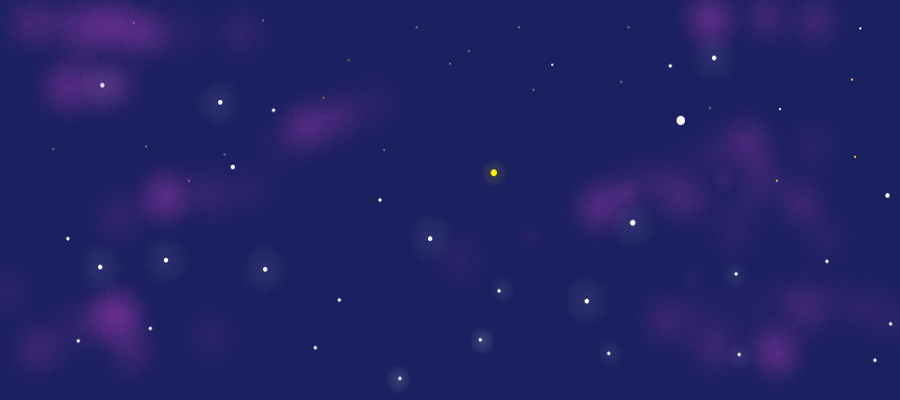

In [59]:
resize_bg_1=bg_image.resize((900,400))
resize_bg_1

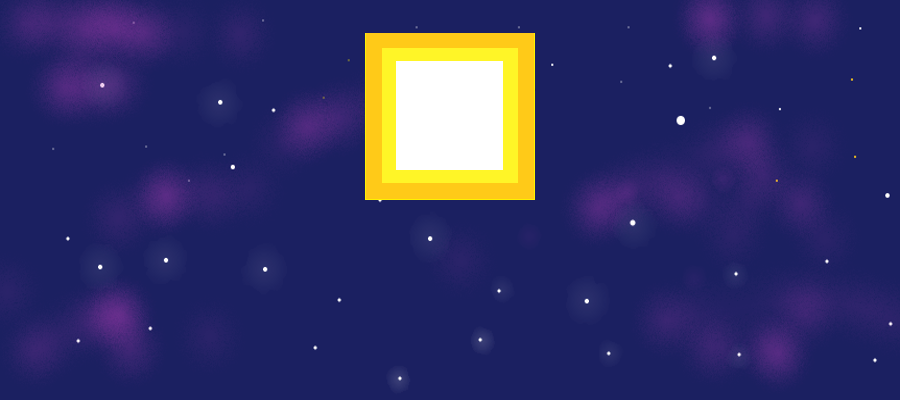

In [60]:
size=(int(resize_bg.size[0]/2-sun_crop_image.size[0]/2),int(resize_bg.size[1]/2-sun_crop_image.size[1]))
resize_bg=resize_bg_1.copy()
resize_bg.paste(sun_crop_image,size, mask = sun_crop_image)
resize_bg

In [65]:
resize_bg.save("D:/Users/Dell/Documents/resources/RESOURCES_KIVY/2_GALAXY/V1/test/bg.png")